# Init

## import

In [32]:
import pandas as pd
import numpy as np
import re

In [2]:
cd ..

/Users/wliao0504/code/clif/CLIF-MIMIC


/Users/wliao0504/.pyenv/versions/3.13.0/lib/python3.13/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
pwd

'/Users/wliao0504/code/clif/CLIF-MIMIC'

In [4]:
# %load_ext autoreload
# %autoreload 2

from src.utils import check_duplicates, find_duplicates, read_from_rclif, clif_table_pathfinder, \
    mimic_table_pathfinder

loaded configuration from /Users/wliao0504/code/clif/CLIF-MIMIC/src/../config/config.json


## load pipeline

In [139]:
import importlib
from src.tables import labs 
importlib.reload(labs)

from src import utils
importlib.reload(utils)

loaded configuration from /Users/wliao0504/code/clif/CLIF-MIMIC/src/../config/config.json


<module 'src.utils' from '/Users/wliao0504/code/clif/CLIF-MIMIC/src/utils.py'>

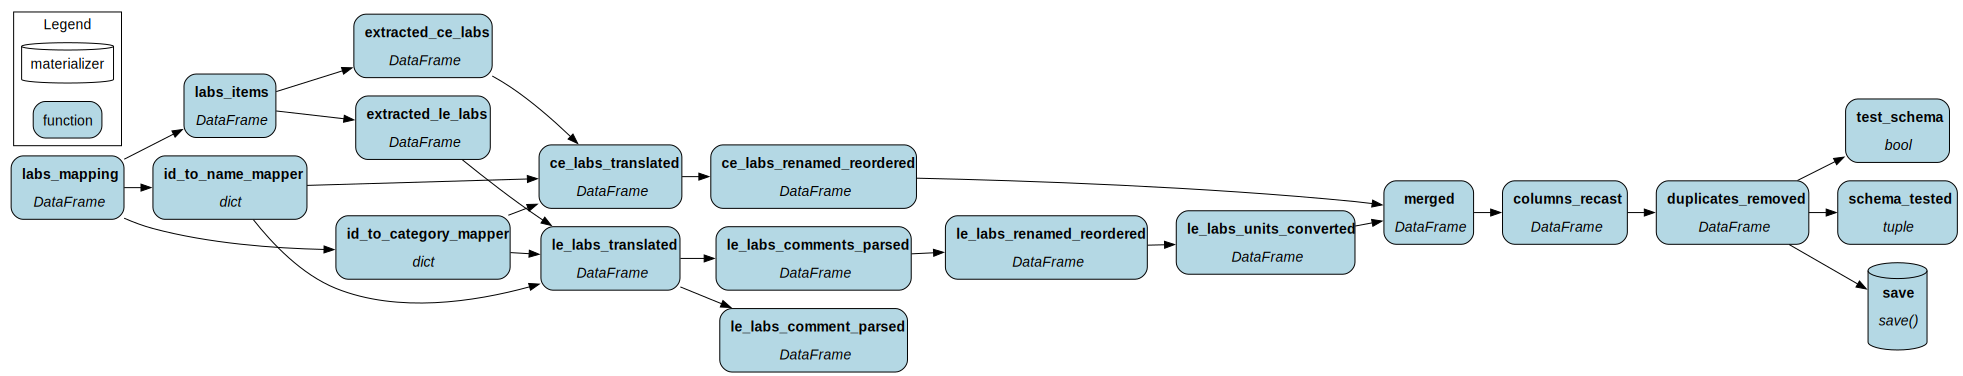

In [140]:
from hamilton import driver

dr = (
    driver.Builder()
    .with_modules(labs)
    # .with_cache()
    .build()
)
dr.display_all_functions()

# Dev

## test pipeline

In [8]:
results = dr.execute(["le_labs_translated"])
le_labs_translated = results["le_labs_translated"]

In [30]:
dr.execute(["duplicates_removed"])

identifying lab items to be extracted from labevents table...
extracting from labevents table...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

constructing item id to name mapper...
constructing item id to category mapper...
translating item ids tolab names and categories...
renaming and reordering...
converting units of measurement...
identifying lab items to be extracted from chartevents table...
extracting from chartevents table...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

translating item ids to lab names and categories...
renaming and reordering...
merging lab events...
cleaning and recasting columns...
starting duplicates removal...


ERROR:hamilton.execution.graph_functions:
********************************************************************************
> duplicates_removed [src.tables.labs.duplicates_removed()] encountered an error<
> Node inputs:
{'columns_recast': '        hospitalization_id lab_order_dttm         ...'}
********************************************************************************
Traceback (most recent call last):
  File "/Users/wliao0504/.pyenv/versions/3.13.0/lib/python3.13/site-packages/pandera/decorators.py", line 386, in _try_validate
    return schema.validate(
           ~~~~~~~~~~~~~~~^
        obj, head, tail, sample, random_state, lazy, inplace
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/Users/wliao0504/.pyenv/versions/3.13.0/lib/python3.13/site-packages/pandera/api/pandas/container.py", line 126, in validate
    return self._validate(
           ~~~~~~~~~~~~~~^
        check_obj=check_obj,
        ^^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
     

SchemaError: error in check_output decorator of function 'duplicates_removed': non-nullable series 'lab_result_dttm' contains null values:
443056     NaT
443057     NaT
443058     NaT
2908532    NaT
4775932    NaT
4775933    NaT
4775934    NaT
10846564   NaT
10846565   NaT
12144151   NaT
21499125   NaT
21499126   NaT
21499127   NaT
23438505   NaT
23438506   NaT
25788664   NaT
31976852   NaT
31976853   NaT
31976854   NaT
31976855   NaT
32134806   NaT
33208958   NaT
35041993   NaT
36903804   NaT
36903805   NaT
36903806   NaT
36952021   NaT
37472810   NaT
37472811   NaT
37472812   NaT
37472813   NaT
37472814   NaT
37472818   NaT
37472819   NaT
42841750   NaT
Name: lab_result_dttm, dtype: datetime64[us, UTC]

In [13]:
dr.cache.view_run()

IndexError: list index out of range

## check NA time issue

In [ ]:
results = dr.execute(["columns_recast"])
columns_recast: pd.DataFrame = results['columns_recast']

In [15]:
columns_recast.head()

,hospitalization_id,lab_order_dttm,lab_collect_dttm,lab_result_dttm,lab_order_name,lab_order_category,lab_name,lab_category,lab_value,lab_value_numeric,reference_unit,lab_specimen_name,lab_specimen_category,lab_loinc_code
0,22077651,NaT,2171-10-02 11:10:00+00:00,2171-10-02 12:40:00+00:00,,,Sodium,sodium,134,134.0,mEq/L,,,
1,22077651,NaT,2171-10-02 11:10:00+00:00,2171-10-02 12:40:00+00:00,,,Urea Nitrogen,bun,20,20.0,mg/dL,,,
2,22077651,NaT,2171-10-02 21:00:00+00:00,2171-10-02 21:19:00+00:00,,,Basophils,basophils_percent,0.1,0.1,%,,,
3,22077651,NaT,2171-10-02 21:00:00+00:00,2171-10-02 21:19:00+00:00,,,Eosinophils,eosinophils_percent,0.1,0.1,%,,,
4,22077651,NaT,2171-10-02 21:00:00+00:00,2171-10-02 21:19:00+00:00,,,Hemoglobin,hemoglobin,12.1,12.1,g/dL,,,


In [20]:
mask = columns_recast["lab_collect_dttm"].isna()
print(f"{mask.sum()} ({mask.mean()*100:.1f}%) rows have NaN for `lab_collect_dttm`")

mask = columns_recast["lab_result_dttm"].isna()
print(f"{mask.sum()} ({mask.mean()*100:.1f}%) rows have NaN for `lab_result_dttm`")
na_result_dttm = columns_recast[mask]
na_result_dttm.head()

0 (0.0%) rows have NaN for `lab_collect_dttm`
35 (0.0%) rows have NaN for `lab_result_dttm`


,hospitalization_id,lab_order_dttm,lab_collect_dttm,lab_result_dttm,lab_order_name,lab_order_category,lab_name,lab_category,lab_value,lab_value_numeric,reference_unit,lab_specimen_name,lab_specimen_category,lab_loinc_code
463546,25061074,NaT,2173-03-24 23:02:00+00:00,NaT,,,pCO2,pco2_arterial,None,NaN,mm Hg,,,
463547,25061074,NaT,2173-03-24 23:02:00+00:00,NaT,,,pH,ph_arterial,None,NaN,units,,,
463548,25061074,NaT,2173-03-24 23:02:00+00:00,NaT,,,pO2,po2_arterial,None,NaN,mm Hg,,,
2855165,28168342,NaT,2164-08-10 14:41:00+00:00,NaT,,,pH,ph_arterial,None,NaN,units,,,
4763925,29789360,NaT,2163-12-30 10:23:00+00:00,NaT,,,pCO2,pco2_arterial,None,NaN,mm Hg,,,


A lot of these NA lab result time is valid in the sense that there was no value recorded either, indicating there was likely something that might have gone wrong in the labs so not result is available. This should prompt us to look closer into the comment issue

## dedup

In [14]:
labs_events_f = read_from_rclif("labs_intm")

In [15]:
len(labs_events_f)

46174325

In [4]:
labs_dups = find_duplicates(labs_events_f, ["hospitalization_id", "lab_collect_dttm", "lab_result_dttm", "lab_category"]) \
    .sort_values(["hospitalization_id", "lab_collect_dttm", "lab_result_dttm", "lab_category"])

labs_dups

,hospitalization_id,lab_order_dttm,lab_collect_dttm,lab_result_dttm,lab_order_name,lab_order_category,lab_name,lab_category,lab_value,lab_value_numeric,reference_unit,lab_specimen_name,lab_specimen_category,lab_loinc_code
9683715,20000147,NaT,2121-08-30 17:38:00,2121-08-30 17:39:00,,,pCO2,pco2_arterial,35,35.00,mm Hg,,,
44761220,20000147,NaT,2121-08-30 17:38:00,2121-08-30 17:39:00,,,Arterial CO2 Pressure,pco2_arterial,35,35.00,mmHg,,,
9683716,20000147,NaT,2121-08-30 17:38:00,2121-08-30 17:39:00,,,pH,ph_arterial,7.41,7.41,units,,,
44762337,20000147,NaT,2121-08-30 17:38:00,2121-08-30 17:39:00,,,PH (Arterial),ph_arterial,7.41,7.41,units,,,
9683717,20000147,NaT,2121-08-30 17:38:00,2121-08-30 17:39:00,,,pO2,po2_arterial,390,390.00,mm Hg,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44775215,29999625,NaT,2157-11-24 02:37:00,2157-11-24 02:40:00,,,Arterial CO2 Pressure,pco2_arterial,43,43.00,mmHg,,,
4567471,29999625,NaT,2157-11-24 02:37:00,2157-11-24 02:40:00,,,pH,ph_arterial,7.41,7.41,units,,,
44776501,29999625,NaT,2157-11-24 02:37:00,2157-11-24 02:40:00,,,PH (Arterial),ph_arterial,7.41,7.41,units,,,
4567472,29999625,NaT,2157-11-24 02:37:00,2157-11-24 02:40:00,,,pO2,po2_arterial,81,81.00,mm Hg,,,


In [5]:
# Drop trivial duplicates
labs_events_fd = labs_events_f.drop_duplicates(
        subset = ["hospitalization_id", "lab_collect_dttm", "lab_result_dttm", "lab_category", "lab_value_numeric"],
        inplace = False)

After we drop the trivial duplicates (where the values are the same and thus simply repeated), we are left with 4015 non-trivial cases: 

In [6]:
labs_dups_d = find_duplicates(labs_events_fd, ["hospitalization_id", "lab_collect_dttm", "lab_result_dttm", "lab_category"]) \
    .sort_values(["hospitalization_id", "lab_collect_dttm", "lab_result_dttm", "lab_category"])

labs_dups_d

,hospitalization_id,lab_order_dttm,lab_collect_dttm,lab_result_dttm,lab_order_name,lab_order_category,lab_name,lab_category,lab_value,lab_value_numeric,reference_unit,lab_specimen_name,lab_specimen_category,lab_loinc_code
18566630,20012928,NaT,2123-03-02 04:45:00,2123-03-02 05:48:00,,,Hemoglobin,hemoglobin,7.7,7.7,g/dL,,,
18566642,20012928,NaT,2123-03-02 04:45:00,2123-03-02 05:48:00,,,Hemoglobin,hemoglobin,7.6,7.6,g/dL,,,
18566631,20012928,NaT,2123-03-02 04:45:00,2123-03-02 05:48:00,,,Platelet Count,platelet_count,148,148.0,K/uL,,,
18566643,20012928,NaT,2123-03-02 04:45:00,2123-03-02 05:48:00,,,Platelet Count,platelet_count,139,139.0,K/uL,,,
38581298,20025172,NaT,2139-12-01 08:38:00,2139-12-01 10:31:00,,,Hemoglobin,hemoglobin,7.7,7.7,g/dL,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22382782,29983564,NaT,2128-06-07 06:47:00,2128-06-07 08:42:00,,,PT,pt,12.3,12.3,sec,,,
22382766,29983564,NaT,2128-06-07 06:47:00,2128-06-07 08:42:00,,,PTT,ptt,28.4,28.4,sec,,,
22382783,29983564,NaT,2128-06-07 06:47:00,2128-06-07 08:42:00,,,PTT,ptt,28.7,28.7,sec,,,
44677336,29984509,NaT,2158-10-22 12:00:00,2158-10-22 12:04:00,,,Mixed Venous O2% Sat,so2_mixed_venous,42,42.0,%,,,


If we discard duplicates that result from many to one mapping (which we can solve by assigning duduplication rank), we are left with the case of geneinue duplicates from the same item (displayed below). Luckily, most of them seem to be close-value duplicates (which we may define as being within 10% from each other). Then the remaining are the most thorny cases: observations of the same item of the same patient at same time that differ dramatically in values. Should we drop either? both? Or are they legit duplicates from two different samples / specimens?
 

In [7]:
labs_dups_d2 = find_duplicates(labs_events_fd, ["hospitalization_id", "lab_collect_dttm", "lab_result_dttm", "lab_name"]) \
    .sort_values(["hospitalization_id", "lab_collect_dttm", "lab_result_dttm", "lab_category"])

In [8]:
# remove some empty columns for better display
labs_dups_d2.drop(
    columns = ["lab_order_dttm", "lab_order_name", "lab_order_category", "lab_specimen_name", "lab_specimen_category", "lab_loinc_code"],
    inplace = True
    )
labs_dups_d2

,hospitalization_id,lab_collect_dttm,lab_result_dttm,lab_name,lab_category,lab_value,lab_value_numeric,reference_unit
18566630,20012928,2123-03-02 04:45:00,2123-03-02 05:48:00,Hemoglobin,hemoglobin,7.7,7.7,g/dL
18566642,20012928,2123-03-02 04:45:00,2123-03-02 05:48:00,Hemoglobin,hemoglobin,7.6,7.6,g/dL
18566631,20012928,2123-03-02 04:45:00,2123-03-02 05:48:00,Platelet Count,platelet_count,148,148.0,K/uL
18566643,20012928,2123-03-02 04:45:00,2123-03-02 05:48:00,Platelet Count,platelet_count,139,139.0,K/uL
38581298,20025172,2139-12-01 08:38:00,2139-12-01 10:31:00,Hemoglobin,hemoglobin,7.7,7.7,g/dL
...,...,...,...,...,...,...,...,...
39224708,29977045,2134-12-23 11:35:00,2134-12-23 13:16:00,Hemoglobin,hemoglobin,6.9,6.9,g/dL
22382765,29983564,2128-06-07 06:47:00,2128-06-07 08:42:00,PT,pt,12.4,12.4,sec
22382782,29983564,2128-06-07 06:47:00,2128-06-07 08:42:00,PT,pt,12.3,12.3,sec
22382766,29983564,2128-06-07 06:47:00,2128-06-07 08:42:00,PTT,ptt,28.4,28.4,sec


In [9]:
labs_dups_d2

,hospitalization_id,lab_collect_dttm,lab_result_dttm,lab_name,lab_category,lab_value,lab_value_numeric,reference_unit
18566630,20012928,2123-03-02 04:45:00,2123-03-02 05:48:00,Hemoglobin,hemoglobin,7.7,7.7,g/dL
18566642,20012928,2123-03-02 04:45:00,2123-03-02 05:48:00,Hemoglobin,hemoglobin,7.6,7.6,g/dL
18566631,20012928,2123-03-02 04:45:00,2123-03-02 05:48:00,Platelet Count,platelet_count,148,148.0,K/uL
18566643,20012928,2123-03-02 04:45:00,2123-03-02 05:48:00,Platelet Count,platelet_count,139,139.0,K/uL
38581298,20025172,2139-12-01 08:38:00,2139-12-01 10:31:00,Hemoglobin,hemoglobin,7.7,7.7,g/dL
...,...,...,...,...,...,...,...,...
39224708,29977045,2134-12-23 11:35:00,2134-12-23 13:16:00,Hemoglobin,hemoglobin,6.9,6.9,g/dL
22382765,29983564,2128-06-07 06:47:00,2128-06-07 08:42:00,PT,pt,12.4,12.4,sec
22382782,29983564,2128-06-07 06:47:00,2128-06-07 08:42:00,PT,pt,12.3,12.3,sec
22382766,29983564,2128-06-07 06:47:00,2128-06-07 08:42:00,PTT,ptt,28.4,28.4,sec


In [10]:
len(labs_events_f)

46174325

In [11]:
f"{(3615 / len(labs_events_f)) * 100:.2f}%"

7.829026195835023e-05

## handle NA lab values (`valuenum`)
sometimes the `value` or `valuenum` are NA, or in a weird blank form "__". need to check if they are always accompanied by otherwise useful comments. This seems a problem unique to the labs events (le) table.

In [18]:
df_le: pd.DataFrame = le_labs_translated

df_le.head()

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments,lab_name,lab_category
0,373283,10023274,25335412,18902407,51146,<NA>,2155-01-08 21:21:00,2155-01-08 21:52:00,0.4,0.4,%,0.0,1.0,<NA>,STAT,<NA>,Basophils,basophils_percent
1,373284,10023274,25335412,18902407,51200,<NA>,2155-01-08 21:21:00,2155-01-08 21:52:00,0.2,0.2,%,1.0,7.0,abnormal,STAT,<NA>,Eosinophils,eosinophils_percent
2,373286,10023274,25335412,18902407,51222,<NA>,2155-01-08 21:21:00,2155-01-08 21:52:00,13.6,13.6,g/dL,13.7,17.5,abnormal,STAT,<NA>,Hemoglobin,hemoglobin
3,373287,10023274,25335412,18902407,51244,<NA>,2155-01-08 21:21:00,2155-01-08 21:52:00,21.1,21.1,%,19.0,53.0,<NA>,STAT,<NA>,Lymphocytes,lymphocytes_percent
4,373291,10023274,25335412,18902407,51254,<NA>,2155-01-08 21:21:00,2155-01-08 21:52:00,7.8,7.8,%,5.0,13.0,<NA>,STAT,<NA>,Monocytes,monocytes_percent


In [19]:
# We start by examining the numeric value field `valuenum`
mask = df_le['valuenum'].isna()
print(f"{mask.sum()} ({mask.mean()*100:.1f}%) rows have NaN for `valuenum`")
na_valuenum: pd.DataFrame = df_le[mask]
na_valuenum.head()

223966 (0.5%) rows have NaN for `valuenum`


,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments,lab_name,lab_category
11,373308,10023274,25335412,61097845,51003,<NA>,2155-01-08 21:21:00,2155-01-08 22:17:00,<NA>,<NA>,ng/mL,0.0,0.01,<NA>,STAT,<0.01. cTropnT > 0.10 ng/mL suggests Acute MI.,Troponin T,troponin_t
35,373346,10023274,25335412,93866128,51003,<NA>,2155-01-09 06:55:00,2155-01-09 09:06:00,<NA>,<NA>,ng/mL,0.0,0.01,<NA>,ROUTINE,<0.01. cTropnT > 0.10 ng/mL suggests Acute MI.,Troponin T,troponin_t
114,373669,10023340,29144403,83673643,51003,<NA>,2122-12-12 06:45:00,2122-12-12 09:10:00,<NA>,<NA>,ng/mL,0.0,0.01,<NA>,ROUTINE,<0.01. CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.,Troponin T,troponin_t
126,373683,10023340,29144403,96681834,51003,<NA>,2122-12-12 18:30:00,2122-12-12 19:33:00,<NA>,<NA>,ng/mL,0.0,0.01,<NA>,STAT,<0.01. CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.,Troponin T,troponin_t
142,373711,10023340,29144403,6558347,51003,<NA>,2122-12-13 08:20:00,2122-12-13 10:36:00,<NA>,<NA>,ng/mL,0.0,0.01,<NA>,STAT,<0.01. CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.,Troponin T,troponin_t


In [14]:
# and look at the prevalence of NA by lab_name
na_valuenum.value_counts('lab_name')

lab_name
Troponin T                         107398
Bilirubin, Total                    14913
PTT                                 13217
Platelet Count                      10364
INR(PT)                             10103
PT                                   9873
Alanine Aminotransferase (ALT)       9445
Hemoglobin                           5463
Basophils                            4286
Neutrophils                          4286
Eosinophils                          4283
Monocytes                            4279
Lymphocytes                          4279
Absolute Basophil Count              4002
Bilirubin, Direct                    3417
C-Reactive Protein                   2843
Urea Nitrogen                        1809
Potassium                            1428
Creatinine                           1217
Glucose                               765
pCO2                                  635
Bicarbonate                           617
Asparate Aminotransferase (AST)       568
Ferritin                 

In [52]:
# also check the join distribution considering comment patterns
dist = na_valuenum.value_counts(['lab_name', 'comments'])\
    .to_frame() \
    .reset_index()
dist

,lab_name,comments,count
0,Troponin T,<0.01. CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.,66054
1,Troponin T,<0.01. cTropnT > 0.10 ng/mL suggests Acute MI.,40239
2,"Bilirubin, Total",<0.2.,14789
3,Alanine Aminotransferase (ALT),<5.,8817
4,PTT,UNABLE TO REPORT.,6814
...,...,...,...
411,"Sodium, Whole Blood",GREEN TOP.,1
412,PT,CITRATE NOT ADJUSTED FOR HIGH HCT.,1
413,Troponin T,. cTropnT > 0.10 ng/mL suggests Acute MI.,1
414,PT,150 IS HIGHEST MEASURED PT.,1


In [53]:
na_valuenum.value_counts(['comments'])\
    .to_frame() \
    .reset_index()

,comments,count
0,<0.01. CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.,66054
1,<0.01. cTropnT > 0.10 ng/mL suggests Acute MI.,40239
2,___,32883
3,UNABLE TO REPORT.,24343
4,<0.2.,18008
...,...,...
232,"HEMOLYSIS FALSELY ELEVATES Mg. HEMOLYZED, MOD...",1
233,CHECKED FOR CLOT.,1
234,"ICTERIC, SLIGHTLY.",1
235,LIPEMIC SPECIMEN.,1


In [24]:
# compare the missing rate by lab_name
df_le['valuenum'].isna().groupby(df_le['lab_name']).mean()

lab_name
Absolute Basophil Count            0.014871
Alanine Aminotransferase (ALT)     0.011932
Albumin                            0.000284
Alkaline Phosphatase               0.000155
Asparate Aminotransferase (AST)    0.000719
Basophils                          0.009275
Bicarbonate                        0.000242
Bilirubin, Direct                  0.086086
Bilirubin, Indirect                0.000841
Bilirubin, Total                   0.019190
C-Reactive Protein                 0.046338
Calcium, Total                     0.000161
Chloride                           0.000156
Chloride, Whole Blood              0.000860
Creatinine                         0.000470
Creatinine, Whole Blood            0.005613
Eosinophils                        0.009268
Ferritin                           0.007780
Free Calcium                       0.000767
Glucose                            0.000277
Hemoglobin                         0.002131
High-Sensitivity CRP               0.047619
INR(PT)                

### parse comment

In [29]:
# this is now essentially a mapping table
dist.head()

,lab_name,comments,count
0,Troponin T,<0.01. CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.,66054
1,Troponin T,<0.01. cTropnT > 0.10 ng/mL suggests Acute MI.,40239
2,"Bilirubin, Total",<0.2.,14789
3,Alanine Aminotransferase (ALT),<5.,8817
4,PTT,UNABLE TO REPORT.,6814


In [90]:
def _parse_labs_comment(comment: str) -> float:
    '''
    Use regular expression to parse the comment and extract the numeric value.
    '''
    match = re.search(r'\d+\.\d+|\d+', comment)
    parsed_number = float(match.group()) if match else np.nan
    comment_lower = comment.lower()
    if "ptt" in comment_lower and "unable" in comment_lower:
        return parsed_number
    # if any part of the comment contains "not done" or "unable to report" (case insensitive), return NA
    if "not done" in comment_lower or "unable" in comment_lower:
        return np.nan    
    return parsed_number

In [117]:
# test cases
comment_parser_tests = {
    "UNABLE TO REPORT.": np.nan,
    "NOT DONE.": np.nan,
    "GREATER THAN 300.  LOW RISK <1.0, AVERAGE RISK 1.0-3.0, HIGH RISK >3.0 (BUT <10).": 300.0,
    "LESS THAN 0.01.  CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.": 0.01,
    "<0.01.  CTROPNT > 0.10 NG/ML SUGGESTS ACUTE MI.": 0.01,
    "<5.": 5.0,
    "<0.2.": 0.2,
    "ND .  Not Done, WBC <=0.1.": np.nan,
    "UNABLE TO REPORT. PTT < 20.": 20.0
}

def _test_parse_labs_comment(comment: str, expected: float) -> bool:
    actual = _parse_labs_comment(comment)
    if np.isnan(expected):
        return np.isnan(actual)
    return np.equal(actual, expected)

for comment, expected in comment_parser_tests.items():
    # print(f"Testing if {comment} returns {expected}...")
    actual = _parse_labs_comment(comment)
    # print(f"Actual: {actual}")
    assert _test_parse_labs_comment(comment, expected), f"Test failed for comment: {comment}"

Now let's try applying the new helper function to clean up the field. This function should only be applied if `valuenum` is NA.

In [93]:
# for some reason the following two alternatives are so much slower
df_le['valuenum'].fillna(
    df_le['comments'].map(lambda x: _parse_labs_comment(x) if pd.notna(x) else np.nan),
    inplace=True
)

df_le['valuenum'] = df_le['valuenum'].mask(
    df_le['valuenum'].isna(),
    df_le['comments'].map(lambda x: _parse_labs_comment(x) if pd.notna(x) else np.nan)
)

/var/folders/yc/t9yjml6j0jn7hyvbns2vqc7m0000gp/T/ipykernel_51425/3135813706.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_le['valuenum'].fillna(


In [115]:
df_le: pd.DataFrame = le_labs_translated
mask = df_le["valuenum"].isna()
df_le.loc[mask, ["valuenum"]] = df_le.loc[mask, "comments"].map(
    lambda x: _parse_labs_comment(x) if pd.notna(x) else np.nan)

df_le.loc[mask, ["value"]] = df_le.loc[mask, "comments"]

In [116]:
df_le.head()

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments,lab_name,lab_category,value_parsed
0,373283,10023274,25335412,18902407,51146,<NA>,2155-01-08 21:21:00,2155-01-08 21:52:00,0.4,0.4,%,0.0,1.0,<NA>,STAT,<NA>,Basophils,basophils_percent,NaN
1,373284,10023274,25335412,18902407,51200,<NA>,2155-01-08 21:21:00,2155-01-08 21:52:00,0.2,0.2,%,1.0,7.0,abnormal,STAT,<NA>,Eosinophils,eosinophils_percent,NaN
2,373286,10023274,25335412,18902407,51222,<NA>,2155-01-08 21:21:00,2155-01-08 21:52:00,13.6,13.6,g/dL,13.7,17.5,abnormal,STAT,<NA>,Hemoglobin,hemoglobin,NaN
3,373287,10023274,25335412,18902407,51244,<NA>,2155-01-08 21:21:00,2155-01-08 21:52:00,21.1,21.1,%,19.0,53.0,<NA>,STAT,<NA>,Lymphocytes,lymphocytes_percent,NaN
4,373291,10023274,25335412,18902407,51254,<NA>,2155-01-08 21:21:00,2155-01-08 21:52:00,7.8,7.8,%,5.0,13.0,<NA>,STAT,<NA>,Monocytes,monocytes_percent,NaN


In [109]:
# check how many NA valuenum remain
print(f"{mask.sum()} ({mask.mean()*100:.1f}%) rows have NaN for `valuenum`")
na_valuenum: pd.DataFrame = df_le[mask]
na_valuenum.head()

80213 (0.2%) rows have NaN for `valuenum`


,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments,lab_name,lab_category,value_parsed
1292,376942,10023486,29094622,16887471,50931,<NA>,2154-06-30 03:22:00,2154-06-30 11:41:00,___,<NA>,mg/dL,70.0,100.0,abnormal,STAT,___,Glucose,glucose_serum,NaN
7783,127271,10007818,22987108,92793433,51222,<NA>,2146-07-12 03:10:00,2146-07-12 04:55:00,UNABLE TO REPORT.,<NA>,g/dL,13.7,17.5,<NA>,STAT,UNABLE TO REPORT.,Hemoglobin,hemoglobin,NaN
12889,501738,10031687,25318200,74977526,50893,<NA>,2141-07-06 09:35:00,2141-07-06 11:21:00,___,<NA>,mg/dL,8.4,10.3,<NA>,STAT,___,"Calcium, Total",calcium_total,NaN
12890,501739,10031687,25318200,74977526,50902,<NA>,2141-07-06 09:35:00,2141-07-06 11:21:00,___,<NA>,mEq/L,96.0,108.0,<NA>,STAT,___,Chloride,chloride,NaN
12892,501741,10031687,25318200,74977526,50931,<NA>,2141-07-06 09:35:00,2141-07-06 11:21:00,___,<NA>,mg/dL,70.0,100.0,<NA>,STAT,___,Glucose,glucose_serum,NaN


In [88]:
na_valuenum.value_counts('comments').to_frame().reset_index().head(40)

,comments,count
0,___,32883
1,UNABLE TO REPORT.,24343
2,NOT DONE.,11987
3,"ND . Not Done, WBC <=0.1.",7974
4,UNABLE TO REPORT CLOTTED.,325
5,UNABLE TO RESULT.,287
6,UNABLE TO PERFORM.,275
7,UNABLE TO REPORT. SPECIMEN QNS.,189
8,"UNABLE TO REPORT. Platelet clumps, blue top t...",188
9,UNABLE TO REPORT. SPECIMEN CLOTTED.,144


### parse the string-based value column

In [113]:
mask =pd.to_numeric(df_le['value'], errors='coerce').isna()
string_only_rows = df_le[mask]

In [114]:
string_only_rows

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments,lab_name,lab_category,value_parsed
11,373308,10023274,25335412,61097845,51003,<NA>,2155-01-08 21:21:00,2155-01-08 22:17:00,<0.01. cTropnT > 0.10 ng/mL suggests Acute MI.,0.01,ng/mL,0.0,0.01,<NA>,STAT,<0.01. cTropnT > 0.10 ng/mL suggests Acute MI.,Troponin T,troponin_t,0.01
16,373317,10023274,25335412,99549918,50931,<NA>,2155-01-08 21:21:00,2155-01-08 22:21:00,___,117.0,mg/dL,70.0,100.0,abnormal,STAT,"If fasting, 70-100 normal, >125 provisional di...",Glucose,glucose_serum,NaN
20,373324,10023274,25335412,99549918,50983,<NA>,2155-01-08 21:21:00,2155-01-08 22:21:00,___,138.0,mEq/L,135.0,147.0,<NA>,STAT,New reference range as of ___.,Sodium,sodium,NaN
30,373339,10023274,25335412,93866128,50931,<NA>,2155-01-09 06:55:00,2155-01-09 09:06:00,___,98.0,mg/dL,70.0,100.0,<NA>,ROUTINE,"If fasting, 70-100 normal, >125 provisional di...",Glucose,glucose_serum,NaN
34,373345,10023274,25335412,93866128,50983,<NA>,2155-01-09 06:55:00,2155-01-09 09:06:00,___,137.0,mEq/L,135.0,147.0,<NA>,ROUTINE,New reference range as of ___.,Sodium,sodium,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44335787,157197006,19887349,26179448,51727684,50931,<NA>,2176-05-10 06:05:00,2176-05-10 07:10:00,___,182.0,mg/dL,70.0,100.0,abnormal,STAT,"If fasting, 70-100 normal, >125 provisional di...",Glucose,glucose_serum,NaN
44335791,157197012,19887349,26179448,51727684,50983,<NA>,2176-05-10 06:05:00,2176-05-10 07:10:00,___,139.0,mEq/L,135.0,147.0,<NA>,STAT,New reference range as of ___.,Sodium,sodium,NaN
44335793,157197015,19887349,26179448,75115505,50813,<NA>,2176-05-10 06:25:00,2176-05-10 06:27:00,___,1.4,mmol/L,0.5,2.0,<NA>,<NA>,GREEN TOP P.VENOUS.,Lactate,lactate,NaN
44335798,157197021,19887349,26179448,42100292,50931,<NA>,2176-05-11 06:05:00,2176-05-11 06:59:00,___,157.0,mg/dL,70.0,100.0,abnormal,STAT,"If fasting, 70-100 normal, >125 provisional di...",Glucose,glucose_serum,NaN


### add comment as non-numeric lab value

In [103]:
df_le['value'] = df_le['value'].fillna(df_le['comments'])

In [107]:
df_le

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments,lab_name,lab_category,value_parsed
0,373283,10023274,25335412,18902407,51146,<NA>,2155-01-08 21:21:00,2155-01-08 21:52:00,0.4,0.4,%,0.0,1.0,<NA>,STAT,<NA>,Basophils,basophils_percent,NaN
1,373284,10023274,25335412,18902407,51200,<NA>,2155-01-08 21:21:00,2155-01-08 21:52:00,0.2,0.2,%,1.0,7.0,abnormal,STAT,<NA>,Eosinophils,eosinophils_percent,NaN
2,373286,10023274,25335412,18902407,51222,<NA>,2155-01-08 21:21:00,2155-01-08 21:52:00,13.6,13.6,g/dL,13.7,17.5,abnormal,STAT,<NA>,Hemoglobin,hemoglobin,NaN
3,373287,10023274,25335412,18902407,51244,<NA>,2155-01-08 21:21:00,2155-01-08 21:52:00,21.1,21.1,%,19.0,53.0,<NA>,STAT,<NA>,Lymphocytes,lymphocytes_percent,NaN
4,373291,10023274,25335412,18902407,51254,<NA>,2155-01-08 21:21:00,2155-01-08 21:52:00,7.8,7.8,%,5.0,13.0,<NA>,STAT,<NA>,Monocytes,monocytes_percent,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44335800,157197025,19887349,26179448,42100292,50970,<NA>,2176-05-11 06:05:00,2176-05-11 06:59:00,4.1,4.1,mg/dL,2.7,4.5,<NA>,STAT,<NA>,Phosphate,phosphate,NaN
44335801,157197026,19887349,26179448,42100292,50971,<NA>,2176-05-11 06:05:00,2176-05-11 06:59:00,3.6,3.6,mEq/L,3.3,5.1,<NA>,STAT,<NA>,Potassium,potassium,NaN
44335802,157197027,19887349,26179448,42100292,50983,<NA>,2176-05-11 06:05:00,2176-05-11 06:59:00,___,143.0,mEq/L,135.0,147.0,<NA>,STAT,New reference range as of ___.,Sodium,sodium,NaN
44335803,157197028,19887349,26179448,42100292,51006,<NA>,2176-05-11 06:05:00,2176-05-11 06:59:00,5,5.0,mg/dL,6.0,20.0,abnormal,STAT,<NA>,Urea Nitrogen,bun,NaN


# Validate

In [141]:
results =dr.execute(["duplicates_removed", "schema_tested"])

loading mapping...
filtering labs items...
identifying lab items to be extracted from labevents table...
extracting from labevents table...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

constructing item id to name mapper...
constructing item id to category mapper...
translating item ids tolab names and categories...
parsing lab comments to recover otherwise missing lab values...
renaming and reordering...
converting units of measurement...
identifying lab items to be extracted from chartevents table...
extracting from chartevents table...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

translating item ids to lab names and categories...
renaming and reordering...
merging lab events...
cleaning and recasting columns...
starting duplicates removal...
testing schema...


In [143]:
e = results["schema_tested"]

In [144]:
e

(True, None)

: 